In [2]:
import pandas as pd
path = "/Users/emrecavus/Desktop/DSA 210 Project/DSA210_Data.csv"
data = pd.read_csv(path, delimiter=';')

In [23]:
data.head()

,Date,Caffeine Intake,Hours of Sleep,Productive Hours
0,09.03.2025,5,5.5,3.5
1,10.03.2025,4,6.5,4.0
2,11.03.2025,4,6.5,4.0
3,12.03.2025,4,6.0,3.0
4,13.03.2025,3,7.0,4.0


# I've successfully loaded the data that I've collected, and I will now start my Exploratory Data Analysis
<h3> First, I will dobule check the structure of my data, then calculate the basic statistics </h3>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              48 non-null     object 
 1   Caffeine Intake   48 non-null     int64  
 2   Hours of Sleep    48 non-null     float64
 3   Productive Hours  48 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
data.describe()

,Caffeine Intake,Hours of Sleep,Productive Hours
count,48.000000,48.000000,48.000000
mean,4.062500,6.947917,4.093750
std,0.908734,1.255793,0.987455
min,2.000000,4.500000,1.000000
25%,3.000000,6.000000,3.500000
50%,4.000000,7.000000,4.000000
75%,5.000000,7.500000,4.500000
max,6.000000,10.000000,6.500000


# Next, I will visualize the distributions of the data using histograms, then I will plot a correlation heatmap

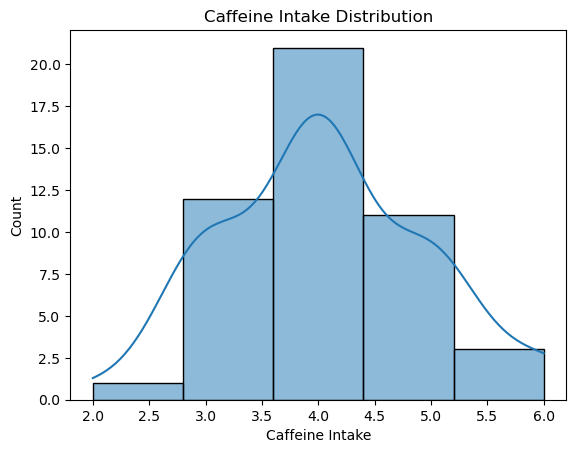

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Caffeine Intake'], bins=5, kde=True)
plt.title("Caffeine Intake Distribution")
plt.show()

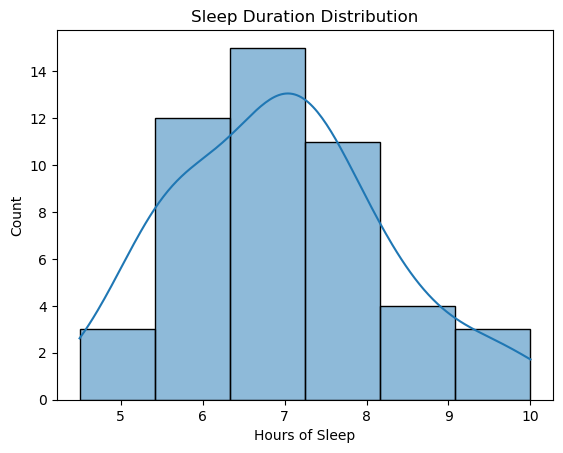

In [7]:
sns.histplot(data['Hours of Sleep'], bins=6, kde=True)
plt.title("Sleep Duration Distribution")
plt.show()

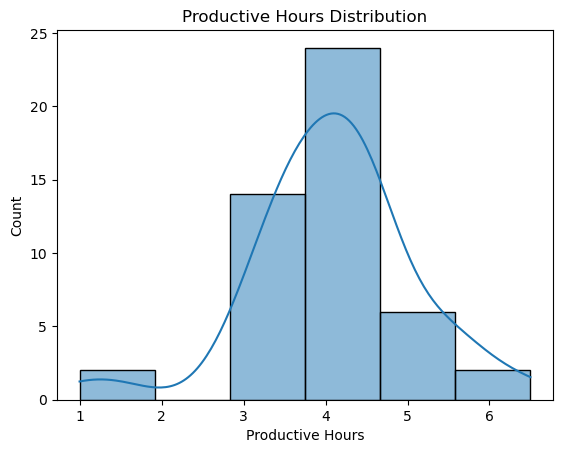

In [8]:
sns.histplot(data['Productive Hours'], bins=6, kde=True)
plt.title("Productive Hours Distribution")
plt.show()

## Now I will plot the boxplots of these variables to see whether there are significant outliers that can lead me to change my approach
<h3> I will also see the interquartile ranges and their endevors </h3>
<h3> Date cannot be converted into a float, so we need to drop it in order to plot the boxplots and the correlation heatmap </h3>

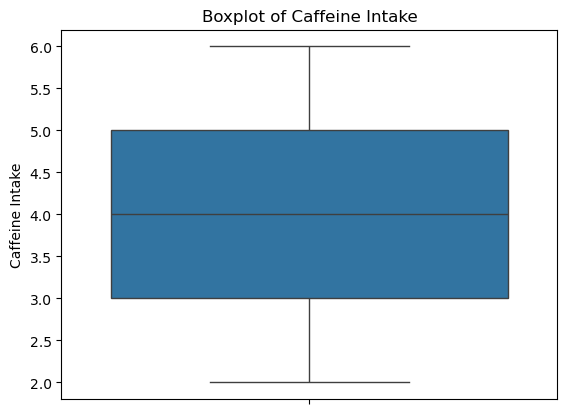

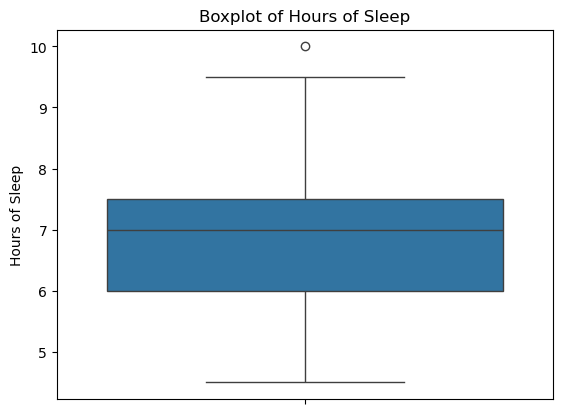

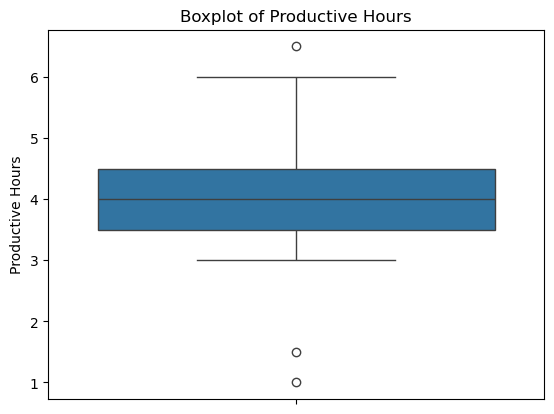

In [9]:
numeric_data = data.drop(columns=['Date'])
for col in numeric_data.columns:
    sns.boxplot(y=numeric_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

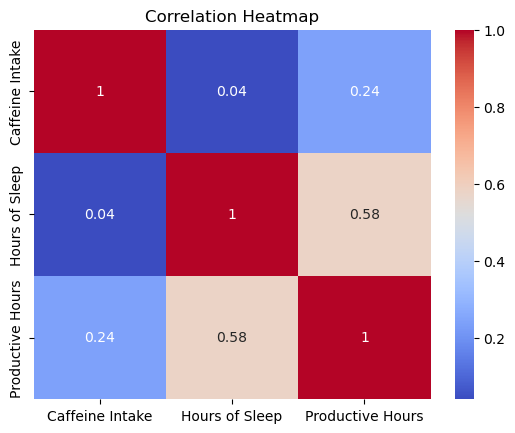

In [10]:
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Now I will do scatter plots for the relationships Caffeine Intake vs Productive Hours and Hours of Sleep vs Productive hours


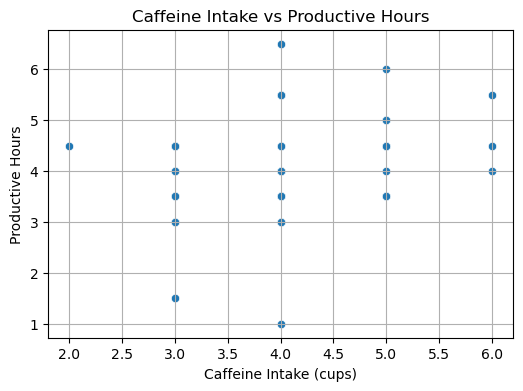

In [11]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_data, x='Caffeine Intake', y='Productive Hours')
plt.title("Caffeine Intake vs Productive Hours")
plt.xlabel("Caffeine Intake (cups)")
plt.ylabel("Productive Hours")
plt.grid(True)
plt.show()

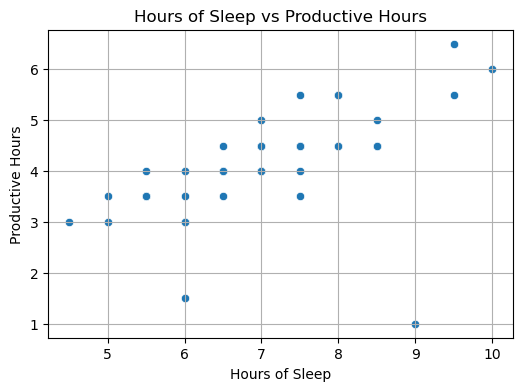

In [12]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=numeric_data, x='Hours of Sleep', y='Productive Hours')
plt.title("Hours of Sleep vs Productive Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Productive Hours")
plt.grid(True)
plt.show()

# As it can be seen from the scatterplots, there is a close to linear relationship between hours of sleep and productive hours 
## On the other hand, there is a weak correlation between caffeine intake and productive hours, so we can't categorize the scatterplot as linear or quadratic

<h3> Next, I will use the regplot method of Seaborn library to find the best fit line between hours of sleep and productive hours </h3>

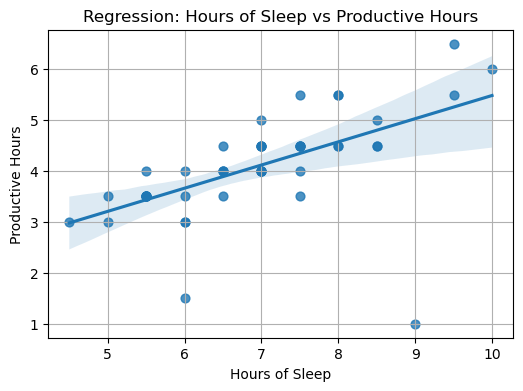

In [13]:
plt.figure(figsize=(6, 4))
sns.regplot(data=numeric_data, x='Hours of Sleep', y='Productive Hours', ci=95, scatter_kws={"s": 40})
plt.title("Regression: Hours of Sleep vs Productive Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Productive Hours")
plt.grid(True)
plt.show()

# The shaded region represents a 95% confidence interval that belongs to the best fit line. #
<h2> As it can be seen from the regplot, a significant portion of the datapoints belong to that confidence interval </h2>
<h3> But, I will examine the quadratic and polynomial types of regressions to see if I can achieve better fits </h3>

In [14]:
import numpy as np
import statsmodels.api as sm
x = numeric_data['Hours of Sleep']
y = numeric_data['Productive Hours']


X_quad = np.column_stack((x**2, x))
X_quad = sm.add_constant(X_quad)
model = sm.OLS(y, X_quad).fit()

x_pred = np.linspace(x.min(), x.max(), 100)
X_pred = np.column_stack((x_pred**2, x_pred))
X_pred = sm.add_constant(X_pred)
y_pred = model.predict(X_pred)

pred_summary = model.get_prediction(X_pred).summary_frame()
ci_lower = pred_summary['mean_ci_lower']
ci_upper = pred_summary['mean_ci_upper']


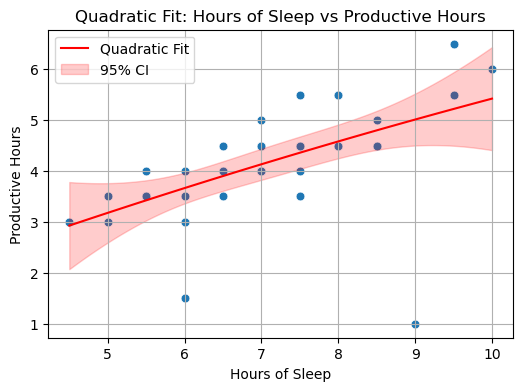

In [15]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=40)
plt.plot(x_pred, y_pred, color='red', label='Quadratic Fit')
plt.fill_between(x_pred, ci_lower, ci_upper, color='red', alpha=0.2, label='95% CI')
plt.title("Quadratic Fit: Hours of Sleep vs Productive Hours")
plt.xlabel("Hours of Sleep")
plt.ylabel("Productive Hours")
plt.legend()
plt.grid(True)
plt.show()

## Both linear and quadratic fits have relatively successful confidence intervals, but the quadratic model is better at explaining the variances and nouances in the data
<h3> Next I will examine the pairwise relationships of the variables </h3>

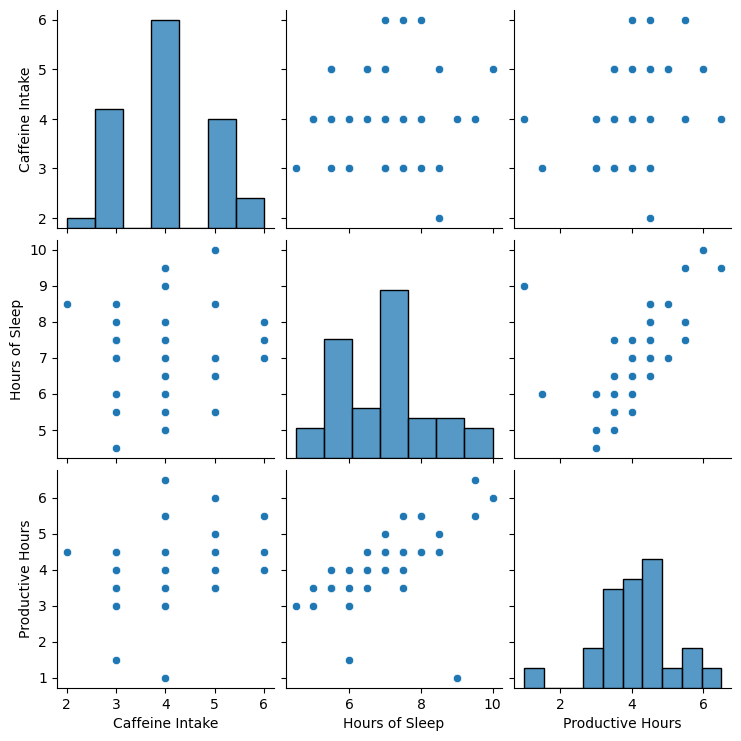

In [16]:
sns.pairplot(numeric_data)
plt.show()

# Hypothesis Testing
## I will divide the hours of sleep into two and see whether their corresponding productivities differ significantly or not
<h3> The mean of hours of sleep is 6.9, thus I will divide it into 2 making 6.5 the threshold for the seperation (lower than 6.5 being lower hours olf sleep and vice versa) </h3>

In [17]:
numeric_data['SleepLevel'] = pd.cut(numeric_data['Hours of Sleep'], bins=[0, 6.5, 10], labels=['Low', 'High'])

In [18]:
numeric_data.head()

,Caffeine Intake,Hours of Sleep,Productive Hours,SleepLevel
0,5,5.5,3.5,Low
1,4,6.5,4.0,Low
2,4,6.5,4.0,Low
3,4,6.0,3.0,Low
4,3,7.0,4.0,High


In [19]:
group_low = numeric_data[numeric_data['SleepLevel'] == 'Low']['Productive Hours']
group_high = numeric_data[numeric_data['SleepLevel'] == 'High']['Productive Hours']
print(group_low.head())
print(group_high.head())

0     3.5
1     4.0
2     4.0
3     3.0
10    3.0
Name: Productive Hours, dtype: float64
4    4.0
5    4.5
6    5.5
7    4.5
8    4.5
Name: Productive Hours, dtype: float64


## H₀: μ₁ - μ₂ = 0 and Hₐ: μ₁ - μ₂ < 0
<h3> Where μ₁ represents the mean of the productive hours of the lower group and μ₂ represents the mean of the productive hours of the higher group </h3>

## The t-statistic for two-sample t test is the following: 
$$
t = \frac{\bar{X}_A - \bar{X}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}
$$

In [20]:
group_low.describe()

count    20.000000
mean      3.475000
std       0.617188
min       1.500000
25%       3.375000
50%       3.500000
75%       4.000000
max       4.500000
Name: Productive Hours, dtype: float64

In [21]:
group_high.describe()

count    28.000000
mean      4.535714
std       0.971145
min       1.000000
25%       4.000000
50%       4.500000
75%       5.000000
max       6.500000
Name: Productive Hours, dtype: float64

$$
\bar{X}_1 \; \text{is} \; 3.475 \quad \text{and} \quad \bar{X}_2 \; \text{is} \; 4.535714
$$

$$
s_1^2 = 0.381 \quad \text{and} \quad s_2^2 = 0.943
$$

$$
n_1 = 20 \quad \text{and} \quad n_2 = 28
$$


# Based on these values the t-statistic under the assumption of null hypothesis is: 
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
= \frac{3.475 - 4.535714}{\sqrt{\frac{0.381}{20} + \frac{0.943}{28}}}
= \frac{-1.060714}{\sqrt{0.01905 + 0.03368}}
= \frac{-1.060714}{\sqrt{0.05273}}
= \frac{-1.060714}{0.22968}
\approx -4.62
$$


### This is a one tailed t-test, so we have to find the value from the one-tailed t table
<h3> Degree of freedom is 20 + 28 - 2 = 46, and our significance level is 0.05 </h3>

In [22]:
from scipy.stats import t

df = len(group_low) + len(group_high) - 2
alpha = 0.05
t_critical = t.ppf(1 - alpha, df)

print(f"Critical t-value (one-tailed, α = 0.05): {t_critical:.4f}")

Critical t-value (one-tailed, α = 0.05): 1.6787


### Hypothesis Test Conclusion

We performed a one-tailed independent two-sample t-test comparing the mean productive hours between individuals with low and high sleeping hours.

- Calculated t-statistic: \( t = -4.62 \)
- Critical t-value at  alpha = 0.05, df = 46: critical value = 1.6787

Since:
\[
|t| = 4.62 > 1.6787 = critical value
\]

we **reject the null hypothesis** (H₀).

**Conclusion:**  
There is statistically significant evidence at the 0.05 level to suggest that individuals who sleep more than 6.5 hours tend to have higher productive hours compared to those who sleep less.

## The ideal routine requires 8 hours of sleep. Now I will create a new field called sleep deficit which will calculate how much sleep do I lack.
<h3> If the hours of sleep is less than 8, the sleep deficit is 0 </h3>

In [24]:
numeric_data['Sleep Deficit'] = np.maximum(0, 8 - numeric_data['Hours of Sleep'])
numeric_data.head()

,Caffeine Intake,Hours of Sleep,Productive Hours,SleepLevel,Sleep Deficit
0,5,5.5,3.5,Low,2.5
1,4,6.5,4.0,Low,1.5
2,4,6.5,4.0,Low,1.5
3,4,6.0,3.0,Low,2.0
4,3,7.0,4.0,High,1.0


## Now I will examine the following: the claim is that the amount of caffeine consumed yesterday triggers the sleep deficit I will have today
### I will conduct hypothesis tests that determines whether caffeine consumption and sleep deficit are independent events or not

In [27]:
numeric_data['Caffeine_Yesterday'] = numeric_data['Caffeine Intake'].shift(1)

## The first data entry will be NaN, so I don't want that.

In [28]:
numeric_data = numeric_data.dropna(subset=['Caffeine_Yesterday'])

In [29]:
numeric_data.head()

,Caffeine Intake,Hours of Sleep,Productive Hours,SleepLevel,Sleep Deficit,Caffeine_Yesterday
1,4,6.5,4.0,Low,1.5,5.0
2,4,6.5,4.0,Low,1.5,4.0
3,4,6.0,3.0,Low,2.0,4.0
4,3,7.0,4.0,High,1.0,4.0
5,4,7.5,4.5,High,0.5,3.0


## I will first apply correlation test to them, later on I will apply Chi-Square tests to see whether they are dependent or not

In [30]:
numeric_data[['Caffeine_Yesterday', 'Sleep Deficit']].corr()

,Caffeine_Yesterday,Sleep Deficit
Caffeine_Yesterday,1.000000,-0.036825
Sleep Deficit,-0.036825,1.000000


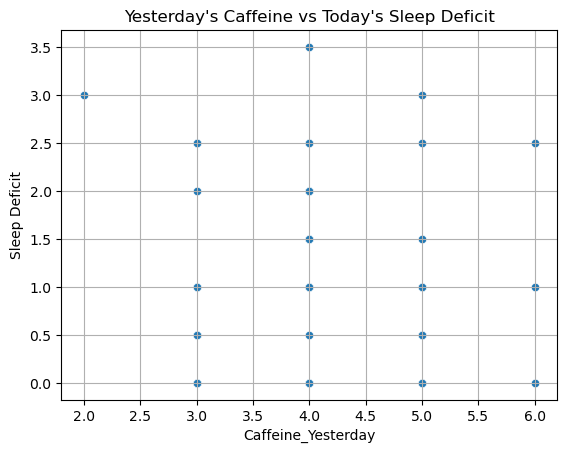

In [31]:
sns.scatterplot(data=numeric_data, x='Caffeine_Yesterday', y='Sleep Deficit')
plt.title("Yesterday's Caffeine vs Today's Sleep Deficit")
plt.grid(True)
plt.show()

## It appears that there is no linear correlation between yesterday's caffeine and today's sleep deficit
### But I will still conduct hypothesis tests for their independence. 

## H₀: Yesterday's caffeine and Today's sleep deficit are independent
## Hₐ: Yesterday's caffeine and Today's sleep deficit are dependent
<h3> As there are too many expected value calculations, this time I will calculate the observed statistic and p_value from Python </h3>

In [33]:
numeric_data.describe()

,Caffeine Intake,Hours of Sleep,Productive Hours,Sleep Deficit,Caffeine_Yesterday
count,47.000000,47.000000,47.000000,47.000000,47.000000
mean,4.042553,6.978723,4.106383,1.180851,4.063830
std,0.907875,1.250902,0.994202,0.991406,0.918511
min,2.000000,4.500000,1.000000,0.000000,2.000000
25%,3.000000,6.000000,3.500000,0.500000,3.000000
50%,4.000000,7.000000,4.000000,1.000000,4.000000
75%,5.000000,7.500000,4.500000,2.000000,5.000000
max,6.000000,10.000000,6.500000,3.500000,6.000000


In [37]:
numeric_data['Caffeine_Yesterday_Binned'] = pd.cut(
    numeric_data['Caffeine_Yesterday'], 
    bins=[0, 3, 5, 7], 
    labels=['Low', 'Medium', 'High']
)

numeric_data['Sleep_Deficit_Binned'] = pd.cut(
    numeric_data['Sleep Deficit'], 
    bins=[-0.1, 1, 2.5, 5], 
    labels=['Low', 'Moderate', 'High']
)


In [41]:
numeric_data.sample(5)

,Caffeine Intake,Hours of Sleep,Productive Hours,SleepLevel,Sleep Deficit,Caffeine_Yesterday,Caffeine_Yesterday_Level,Caffeine_Yesterday_Binned,Sleep_Deficit_Binned
41,2,8.5,4.5,High,0.0,3.0,Low,Low,Low
28,4,7.0,4.0,High,1.0,5.0,Medium,Medium,Low
22,3,8.5,4.5,High,0.0,3.0,Low,Low,Low
12,3,7.0,4.0,High,1.0,5.0,Medium,Medium,Low
7,3,7.0,4.5,High,1.0,4.0,Medium,Medium,Low


In [45]:
pd.crosstab(numeric_data['Caffeine_Yesterday_Binned'], numeric_data['Sleep_Deficit_Binned'])

Sleep_Deficit_Binned,Low,Moderate,High
Caffeine_Yesterday_Binned,,,
Low,9,3,1
Medium,17,12,2
High,2,1,0


## There are 3 categories for sleep deficit and caffeine yesterday. As our hypothesis will be conducted on an r x c table, the degree of freedom will be (r-1)x(c-1) = 2 x 2 = 4. 

### Contingency Table: Yesterday's Caffeine vs Today's Sleep Deficit

| Yesterday's Caffeine | Low | Moderate | High | **Total** |
|----------------------|-----|----------|------|----------|
| **Low**              | 11  | 3        | 1    | 15       |
| **Medium**           | 12  | 5        | 5    | 22       |
| **High**             | 5   | 2        | 2    | 9        |
| **Total**            | 28  | 10       | 8    | **46**   |


## Exptected value of the index (i,j) is equal to the following = (the total of j the column x the total of i th row) / (the grand total)

### Expected Counts Table (Under H₀)

| Yesterday's Caffeine | Low | Moderate | High | **Total** |
|----------------------|-----|----------|------|----------|
| **Low**              | 9.13 | 3.26     | 2.61 | 15.00    |
| **Medium**           | 13.39 | 4.78    | 3.83 | 22.00    |
| **High**             | 5.48 | 1.96     | 1.57 | 9.01     |
| **Total**            | 28.00 | 10.00   | 8.01 | 46.01    |


## Then the observed chi-square statistic becomes: 
$$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}} 
= \frac{(11 - 9.13)^2}{9.13} 
+ \frac{(3 - 3.26)^2}{3.26} 
+ \frac{(1 - 2.61)^2}{2.61} 
+ \cdots 
\approx 2.07
$$


From the chi-square table, the critical value which represents the chi-square distribution with 4 degrees of freedom at a 0.05 significance level is 9.488. 

Since the observed statistic is: 2.07 < 9.488,
we **fail to reject the null hypothesis**.

This means the data **does not provide sufficient evidence** to suggest a dependency between caffeine consumption yesterday and sleep deficit today.  
In other words, the data is **consistent with the assumption of independence** between the two variables.
